# Visual Analysis of Billboard Top 100 (1958-2021)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
billboard = pd.read_csv('billboard_top_100.csv')

In [3]:
billboard.head(20)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,11/6/2021,1,Easy On Me,Adele,1.0,1,3
1,11/6/2021,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,11/6/2021,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,11/6/2021,4,Fancy Like,Walker Hayes,4.0,3,19
4,11/6/2021,5,Bad Habits,Ed Sheeran,5.0,2,18
5,11/6/2021,6,Way 2 Sexy,Drake Featuring Future & Young Thug,6.0,1,8
6,11/6/2021,7,Shivers,Ed Sheeran,9.0,7,7
7,11/6/2021,8,Good 4 U,Olivia Rodrigo,7.0,1,24
8,11/6/2021,9,Need To Know,Doja Cat,11.0,9,20
9,11/6/2021,10,Levitating,Dua Lipa,8.0,2,56


In [4]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   rank            330087 non-null  int64  
 2   song            330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.6+ MB


In [5]:
billboard['date'] = pd.to_datetime(billboard['date'])

In [6]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            330087 non-null  datetime64[ns]
 1   rank            330087 non-null  int64         
 2   song            330087 non-null  object        
 3   artist          330087 non-null  object        
 4   last-week       297775 non-null  float64       
 5   peak-rank       330087 non-null  int64         
 6   weeks-on-board  330087 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.6+ MB


## Average Number of Songs Per Artist on The Billboard Charts:

In [7]:
df_1 = billboard['song'].nunique()
df_2 = billboard['artist'].nunique()
df_3 = df_1 / df_2
print('Number of unique songs: ', df_1)
print('Number of unique artists: ', df_2)
print('Average number of songs per artist: ', df_3)

Number of unique songs:  24620
Number of unique artists:  10205
Average number of songs per artist:  2.4125428711415973


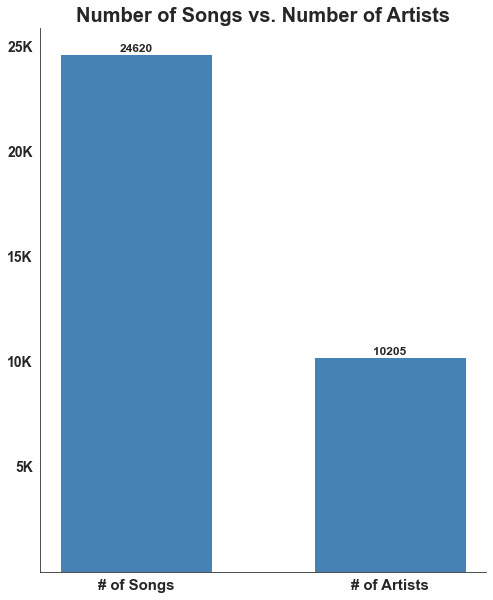

In [8]:
plt.figure(figsize = (8,10))
sns.set_style('white')
plt.bar(['# of Songs', '# of Artists'], [df_1, df_2], color = 'SteelBlue', width = 0.6)
plt.yticks([5000, 10000, 15000, 20000, 25000], labels = ['5K', '10K', '15K', '20K', '25K'], fontsize = 14, 
           fontweight = 'bold')
plt.xticks(['# of Songs', '# of Artists'], fontsize = 15, fontweight = 'bold')
plt.title('Number of Songs vs. Number of Artists', fontsize = 20, fontweight = 'bold')
plt.text(0, 24620, 24620, ha = 'center', va = 'bottom', fontsize = 12, fontweight = 'bold')
plt.text(1, 10205, 10205, ha = 'center', va = 'bottom', fontsize = 12, fontweight = 'bold')
sns.despine()
plt.show()

## Top 20 Songs That Were on The Charts The Longest Number of Weeks:

In [9]:
df_4 = billboard[['artist', 'song']]
df_5 = df_4.groupby('artist')['song'].value_counts().sort_values(ascending = False)
top_20 = df_5.head(20)
print(top_20)

artist                                     song                               
The Weeknd                                 Blinding Lights                        90
Imagine Dragons                            Radioactive                            87
AWOLNATION                                 Sail                                   79
Jason Mraz                                 I'm Yours                              76
LeAnn Rimes                                How Do I Live                          69
LMFAO Featuring Lauren Bennett & GoonRock  Party Rock Anthem                      68
OneRepublic                                Counting Stars                         68
Adele                                      Rolling In The Deep                    65
Jewel                                      Foolish Games/You Were Meant For Me    65
Carrie Underwood                           Before He Cheats                       64
Gabby Barrett Featuring Charlie Puth       I Hope                      

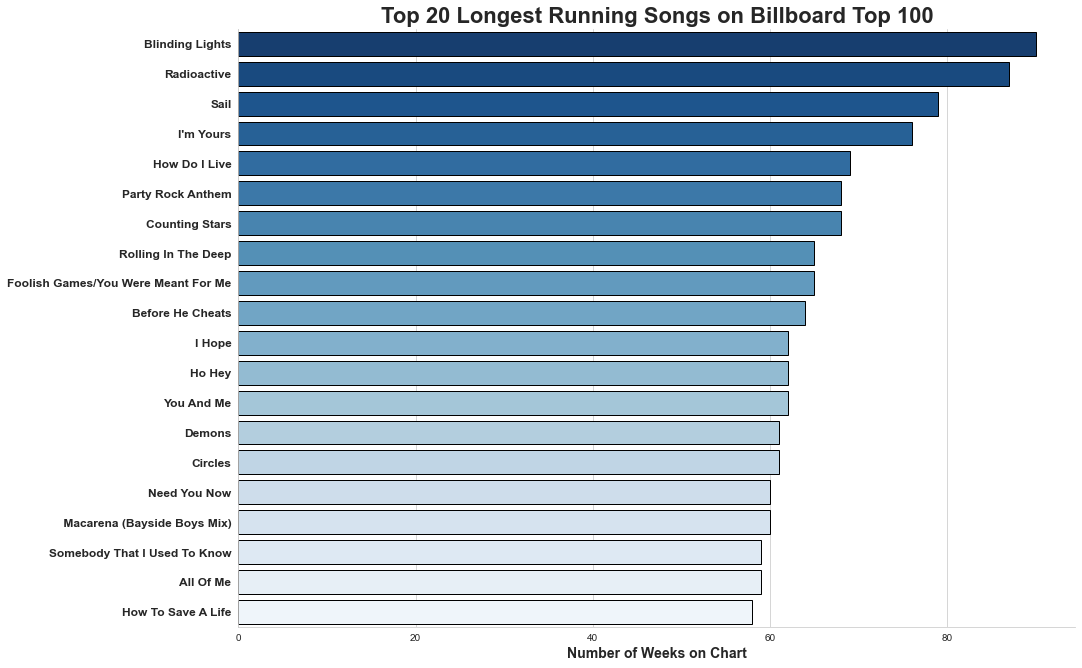

In [10]:
weeks_on_chart = [90, 87, 79, 76, 69, 68, 68, 65, 65, 64, 62, 62, 62, 61, 61, 60, 60, 59, 59, 58]
songs = ["Blinding Lights", "Radioactive", "Sail", "I'm Yours", "How Do I Live", "Party Rock Anthem", "Counting Stars",
        "Rolling In The Deep", "Foolish Games/You Were Meant For Me", "Before He Cheats", "I Hope", "Ho Hey", "You And Me",
        "Demons", "Circles", "Need You Now", " Macarena (Bayside Boys Mix)", "Somebody That I Used To Know", "All Of Me",
        "How To Save A Life"]
plt.figure(figsize = (15, 11))
sns.set_style('whitegrid')
sns.barplot(data = top_20, x = weeks_on_chart, y = songs, edgecolor = 'black', palette = 'Blues_r')
sns.despine()
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.xlabel('Number of Weeks on Chart', fontsize = 14, fontweight = 'bold')
plt.title('Top 20 Longest Running Songs on Billboard Top 100', fontsize = 22, fontweight = 'bold')
plt.show()

## Tracking The Top 5 Longest Running Songs on Billboard Top 100 Over Time:

In [11]:
df_6 = df_5.head()
print(df_6)

artist           song           
The Weeknd       Blinding Lights    90
Imagine Dragons  Radioactive        87
AWOLNATION       Sail               79
Jason Mraz       I'm Yours          76
LeAnn Rimes      How Do I Live      69
Name: song, dtype: int64


In [12]:
df_7 = billboard.loc[(billboard['artist'] == 'The Weeknd') & (billboard['song'] == 'Blinding Lights')]
the_weeknd = df_7[['date', 'rank', 'song', 'artist']]

df_8 = billboard.loc[(billboard['artist'] == 'Imagine Dragons') & (billboard['song'] == 'Radioactive')]
imagine_dragons = df_8[['date', 'rank', 'song', 'artist']]

df_9 = billboard.loc[(billboard['artist'] == 'AWOLNATION') & (billboard['song'] == 'Sail')]
awolnation = df_9[['date', 'rank', 'song', 'artist']]

df_10 = billboard.loc[(billboard['artist'] == 'Jason Mraz') & (billboard['song'] == "I'm Yours")]
jason_mraz = df_10[['date', 'rank', 'song', 'artist']]

df_11 = billboard.loc[(billboard['artist'] == 'LeAnn Rimes') & (billboard['song'] == 'How Do I Live')]
leann_rimes = df_11[['date', 'rank', 'song', 'artist']]

top_5 = [the_weeknd, imagine_dragons, awolnation, jason_mraz, leann_rimes]

In [13]:
leann_rimes_min_date = leann_rimes['date'].min()
leann_rimes_max_date = leann_rimes['date'].max()

jason_mraz_min_date = jason_mraz['date'].min()
jason_mraz_max_date = jason_mraz['date'].max()

awolnation_min_date = awolnation['date'].min()
awolnation_max_date = awolnation['date'].max()

imagine_dragons_min_date = imagine_dragons['date'].min()
imagine_dragons_max_date = imagine_dragons['date'].max()

the_weeknd_min_date = the_weeknd['date'].min()
the_weeknd_max_date = the_weeknd['date'].max()

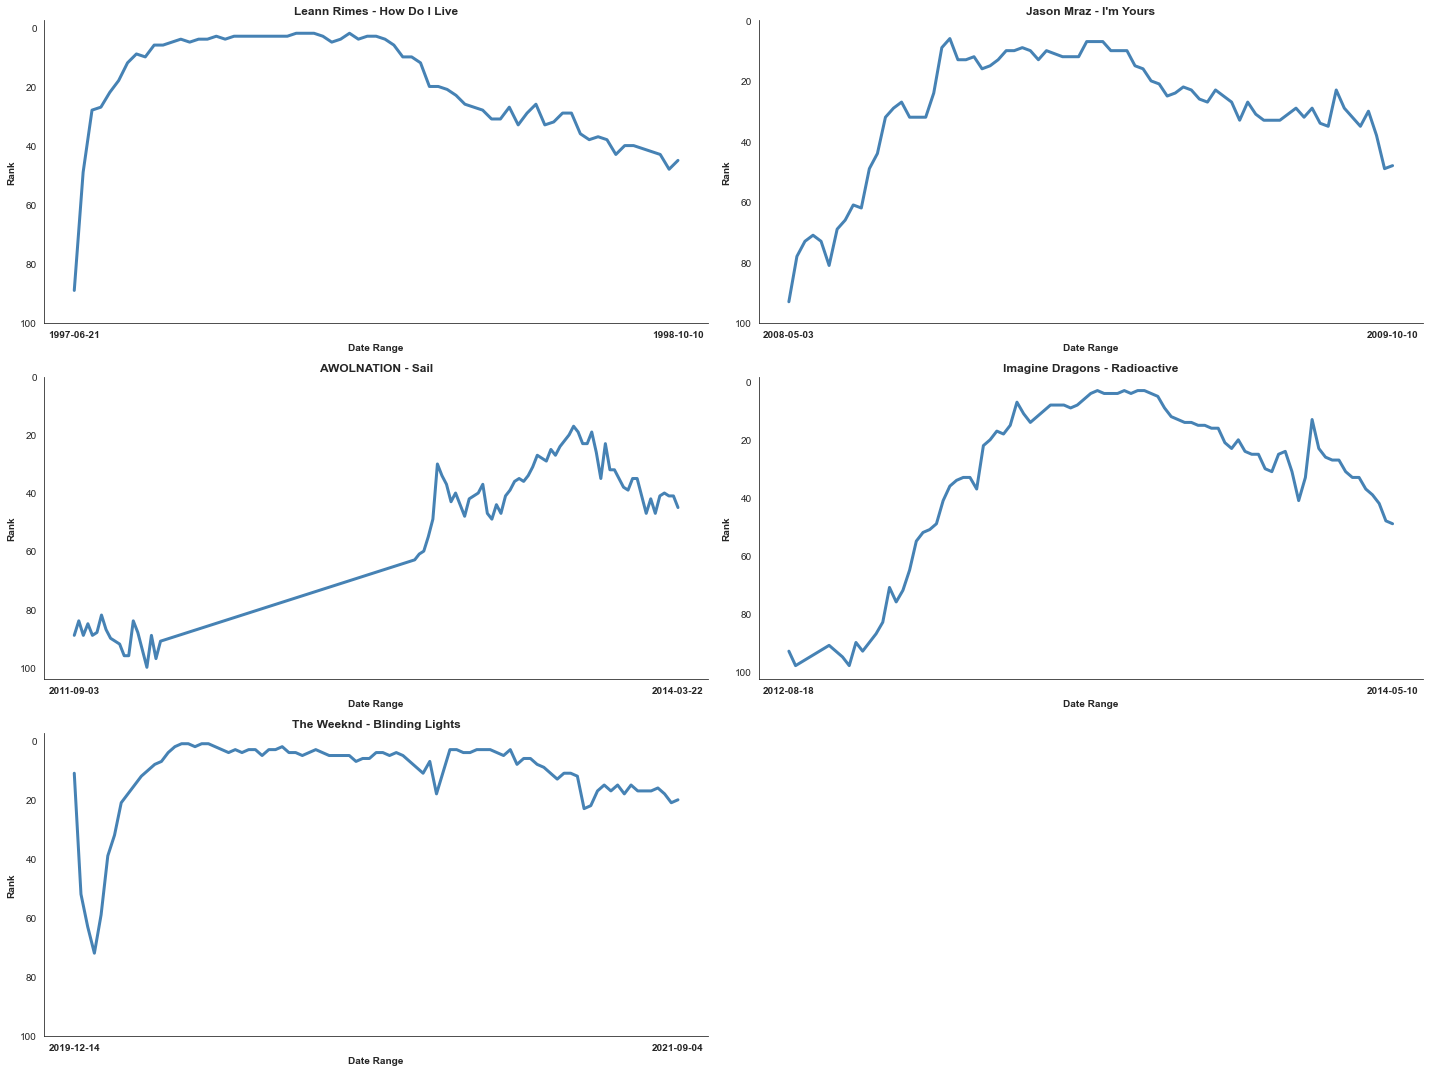

In [14]:
sns.set_style('white')
plt.figure(figsize = (20,15))
ax = plt.subplot()

plt.subplot(3,2,1)
sns.lineplot(data = leann_rimes, x = 'date', y = 'rank', color = 'SteelBlue', linewidth = 3)
plt.gca().invert_yaxis()
plt.yticks([100, 80, 60, 40, 20, 0])
plt.title('Leann Rimes - How Do I Live', fontweight = 'bold')
plt.xticks([leann_rimes_min_date, leann_rimes_max_date], fontweight = 'bold')
plt.xlabel('Date Range', fontweight = 'bold')
plt.ylabel('Rank', fontweight = 'bold')

plt.subplot(3,2,2)
sns.lineplot(data = jason_mraz, x = 'date', y = 'rank', color = 'SteelBlue', linewidth = 3)
plt.gca().invert_yaxis()
plt.yticks([100, 80, 60, 40, 20, 0])
plt.title("Jason Mraz - I'm Yours", fontweight = 'bold')
plt.xticks([jason_mraz_min_date, jason_mraz_max_date], fontweight = 'bold')
plt.xlabel('Date Range', fontweight = 'bold')
plt.ylabel('Rank', fontweight = 'bold')

plt.subplot(3,2,3)
sns.lineplot(data = awolnation, x = 'date', y = 'rank', color = 'SteelBlue', linewidth = 3)
plt.gca().invert_yaxis()
plt.yticks([100, 80, 60, 40, 20, 0])
plt.title('AWOLNATION - Sail', fontweight = 'bold')
plt.xticks([awolnation_min_date, awolnation_max_date], fontweight = 'bold')
plt.xlabel('Date Range', fontweight = 'bold')
plt.ylabel('Rank', fontweight = 'bold')

plt.subplot(3,2,4)
sns.lineplot(data = imagine_dragons, x = 'date', y = 'rank', color = 'SteelBlue', linewidth = 3)
plt.gca().invert_yaxis()
plt.yticks([100, 80, 60, 40, 20, 0])
plt.title('Imagine Dragons - Radioactive', fontweight = 'bold')
plt.xticks([imagine_dragons_min_date, imagine_dragons_max_date], fontweight = 'bold')
plt.xlabel('Date Range', fontweight = 'bold')
plt.ylabel('Rank', fontweight = 'bold')

plt.subplot(3,2,5)
sns.lineplot(data = the_weeknd, x = 'date', y = 'rank', color = 'SteelBlue', linewidth = 3)
plt.gca().invert_yaxis()
plt.yticks([100, 80, 60, 40, 20, 0])
plt.title('The Weeknd - Blinding Lights', fontweight = 'bold')
plt.xticks([the_weeknd_min_date, the_weeknd_max_date], fontweight = 'bold')
plt.xlabel('Date Range', fontweight = 'bold')
plt.ylabel('Rank', fontweight = 'bold')

sns.despine()
plt.tight_layout()
plt.show()

## Songs With Features vs. Songs Without Features: How Many?

In [15]:
# Number of songs with features
df_12 = billboard[billboard['artist'].str.contains(' X ')]
df_13 = billboard[billboard['artist'].str.contains('featuring')]
df_14 = billboard[billboard['artist'].str.contains('Featuring')]
df_15 = billboard[billboard['artist'].str.contains('&')]
df_16 = billboard[billboard['artist'].str.contains('Feat.')]

possible_features = pd.concat([df_12, df_13, df_14, df_15, df_16], ignore_index = True)
unique_features = possible_features['artist'].nunique()
print('Number of songs with features:',unique_features)

# Number of songs without features
total_artists = billboard['artist'].nunique()
no_features = total_artists - unique_features
print('Number of songs without features:',no_features)

Number of songs with features: 3334
Number of songs without features: 6871


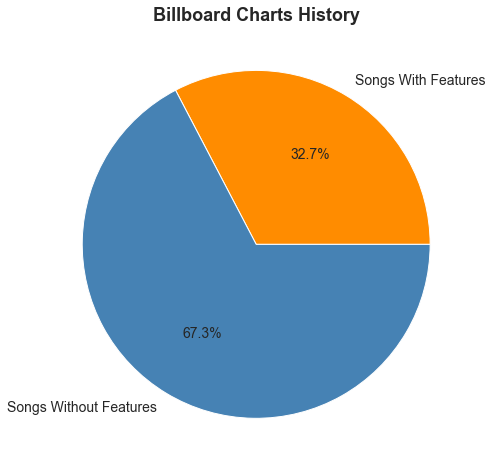

In [16]:
plt.figure(figsize = (8,8))
labels = ['Songs With Features', 'Songs Without Features']
plt.pie([unique_features, no_features], labels = labels, autopct='%1.1f%%', colors = ['DarkOrange', 'SteelBlue'],
       textprops={'fontsize': 14})
plt.title('Billboard Charts History', fontweight = 'bold', fontsize = 18)
plt.show()

## Songs With Features vs. Songs Without Features: Average Length on Chart

In [17]:
# Average length of weeks on Billboard for songs with featured artists
average_length_features = possible_features.groupby('song')['weeks-on-board'].max()
len_features = average_length_features.mean()
print('Average length of weeks on Billboard for songs WITH featured artists:', len_features)

# Average length of weeks on Billboard for songs without a featured artist
df_17 = billboard
df_18 = df_17.loc[df_17['artist'].str.contains('&') == False]
df_19 = df_18.loc[df_18['artist'].str.contains(' X ') == False]
df_20 = df_19.loc[df_19['artist'].str.contains('featuring') == False]
df_21 = df_20.loc[df_20['artist'].str.contains('Featuring') == False]
df_22 = df_21.loc[df_21['artist'].str.contains('Feat.') == False]
average_length_non_features = df_22.groupby('song')['weeks-on-board'].max()
len_non_features = average_length_non_features.mean()
print('Average length of weeks on Billboard for songs WITHOUT a featured artist:',len_non_features)

Average length of weeks on Billboard for songs WITH featured artists: 11.727596862372236
Average length of weeks on Billboard for songs WITHOUT a featured artist: 11.665757931844889


## Number of Different Songs Ranked #1 Each Year:

In [18]:
billboard['year'] = pd.DatetimeIndex(billboard['date']).year
df_23 = billboard.loc[billboard['rank'] == 1]
df_24 = df_23.groupby('year')['song'].nunique().reset_index()
df_25 = df_23.groupby('year')['song'].unique().reset_index()
print(df_24)
print(df_25)

    year  song
0   1958     8
1   1959    16
2   1960    19
3   1961    22
4   1962    21
..   ...   ...
59  2017    12
60  2018    12
61  2019    16
62  2020    22
63  2021    18

[64 rows x 2 columns]
    year                                               song
0   1958  [The Chipmunk Song, To Know Him, Is To Love Hi...
1   1959  [Why, Heartaches By The Number, Mack The Knife...
2   1960  [Are You Lonesome To-night?, Stay, Georgia On ...
3   1961  [The Lion Sleeps Tonight, Please Mr. Postman, ...
4   1962  [Telstar, Big Girls Don't Cry, He's A Rebel, M...
..   ...                                                ...
59  2017  [Perfect, Rockstar, Bodak Yellow (Money Moves)...
60  2018  [Thank U, Next, Sicko Mode, Girls Like You, In...
61  2019  [All I Want For Christmas Is You, Heartless, C...
62  2020  [Willow, All I Want For Christmas Is You, Mood...
63  2021  [Easy On Me, Industry Baby, Stay, My Universe,...

[64 rows x 2 columns]


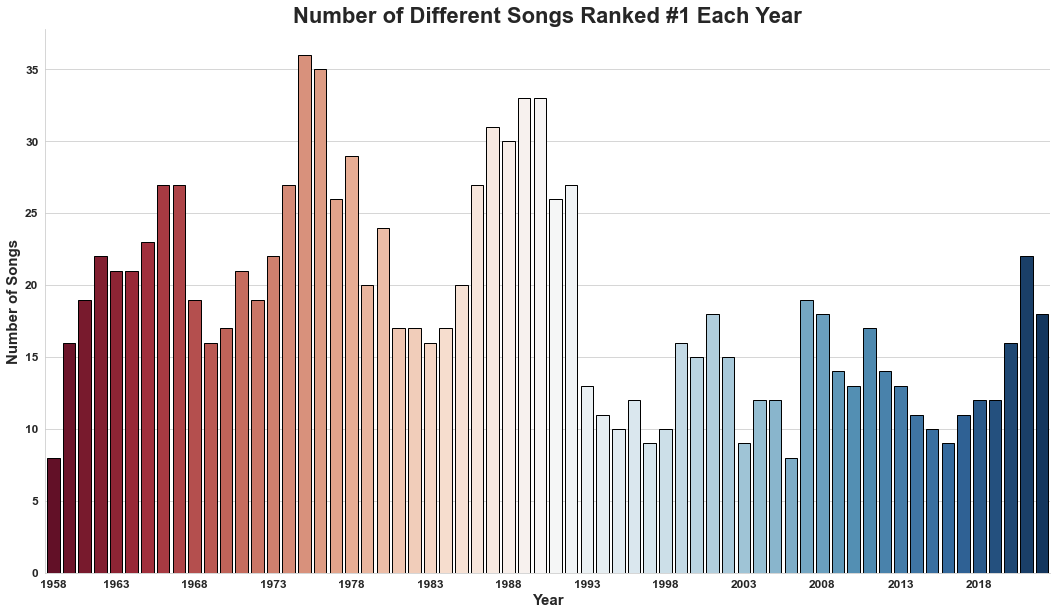

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
sns.barplot(data = df_24, x = 'year', y = 'song', palette = 'RdBu', edgecolor = 'black')
plt.xlabel('Year', fontsize = 15, fontweight = 'bold')
plt.xticks([0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59], 
           labels = ['1958', '1963', '1968', '1973', '1978', '1983', '1988', '1993',
                    '1998', '2003', '2008', '2013', '2018'], fontweight = 'bold', fontsize = 12)
plt.ylabel('Number of Songs', fontweight = 'bold', fontsize = 15)
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.title('Number of Different Songs Ranked #1 Each Year', fontsize = 22, fontweight = 'bold')

sns.despine()
plt.show()